<a href="https://colab.research.google.com/github/9326986324/test-repo/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
from warnings import filterwarnings
filterwarnings('ignore')

In [226]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/PowerPlant.csv')

In [227]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [229]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [230]:
df.duplicated().sum()

np.int64(41)

In [231]:
df=df.drop_duplicates()

In [232]:
X = df.drop(columns=['PE'])
Y = df[["PE"]]

In [233]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [234]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [235]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [236]:
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),StandardScaler()).set_output(transform='pandas')

In [237]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [238]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [239]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.85,random_state=21)

In [240]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(8097, 4) (1430, 4) (8097, 1) (1430, 1)


In [241]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [242]:
xtrain.shape

(8097, 4)

In [243]:
xtrain.shape[1]

4

In [244]:
model = Sequential()

model.add(Input(shape=(xtrain.shape[1],)))

model.add(Dense(units=8,activation='relu'))

model.add(Dense(units=4,activation='relu'))

model.add(Dense(units=1,activation='linear'))

In [245]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [246]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [247]:
nn = model.fit(xtrain,ytrain,validation_split=0.2,epochs=40)

Epoch 1/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 205013.1406 - mae: 452.4724 - val_loss: 202024.8750 - val_mae: 449.1720
Epoch 2/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 198065.1406 - mae: 444.7358 - val_loss: 184039.2344 - val_mae: 428.7233
Epoch 3/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175455.7031 - mae: 418.4179 - val_loss: 144714.7969 - val_mae: 379.4399
Epoch 4/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 131768.7344 - mae: 360.8094 - val_loss: 91708.6484 - val_mae: 296.3627
Epoch 5/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80636.0625 - mae: 273.6794 - val_loss: 50521.1445 - val_mae: 203.2918
Epoch 6/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45449.0273 - mae: 190.5707 - val_loss: 30829.7559 - val_mae: 150.7799
Epoch 7/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28730.8359 - mae: 143.9669 - val_loss: 22607.5781 - val_mae: 128.6056
Epoch 8/40
203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22432.0977 - mae: 127.3

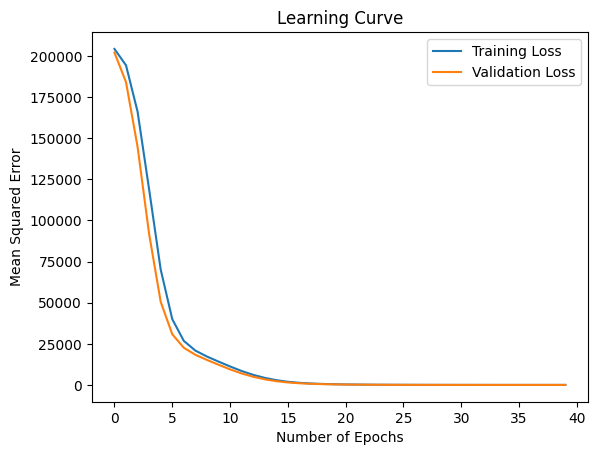

In [248]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learning Curve")
plt.show()